<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generate Data from Different Distributions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating data
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)
poisson_data = np.random.poisson(lam=3, size=1000)
normal_data = np.random.normal(loc=0, scale=1, size=1000)


**Explore the Central Limit Theorem Through Sampling**

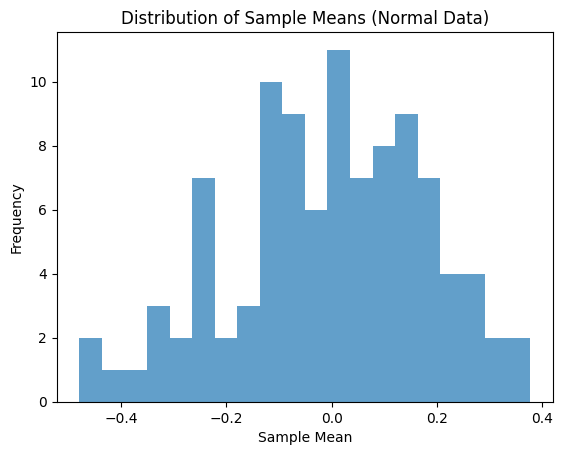

In [2]:
def sample_means(data, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Taking 100 samples of size 30 from normal data
sample_means_normal = sample_means(normal_data, 30, 100)

# Plotting the distribution of sample means
plt.hist(sample_means_normal, bins=20, alpha=0.7)
plt.title('Distribution of Sample Means (Normal Data)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


**Visualize Distribution Characteristics and Sample Means**

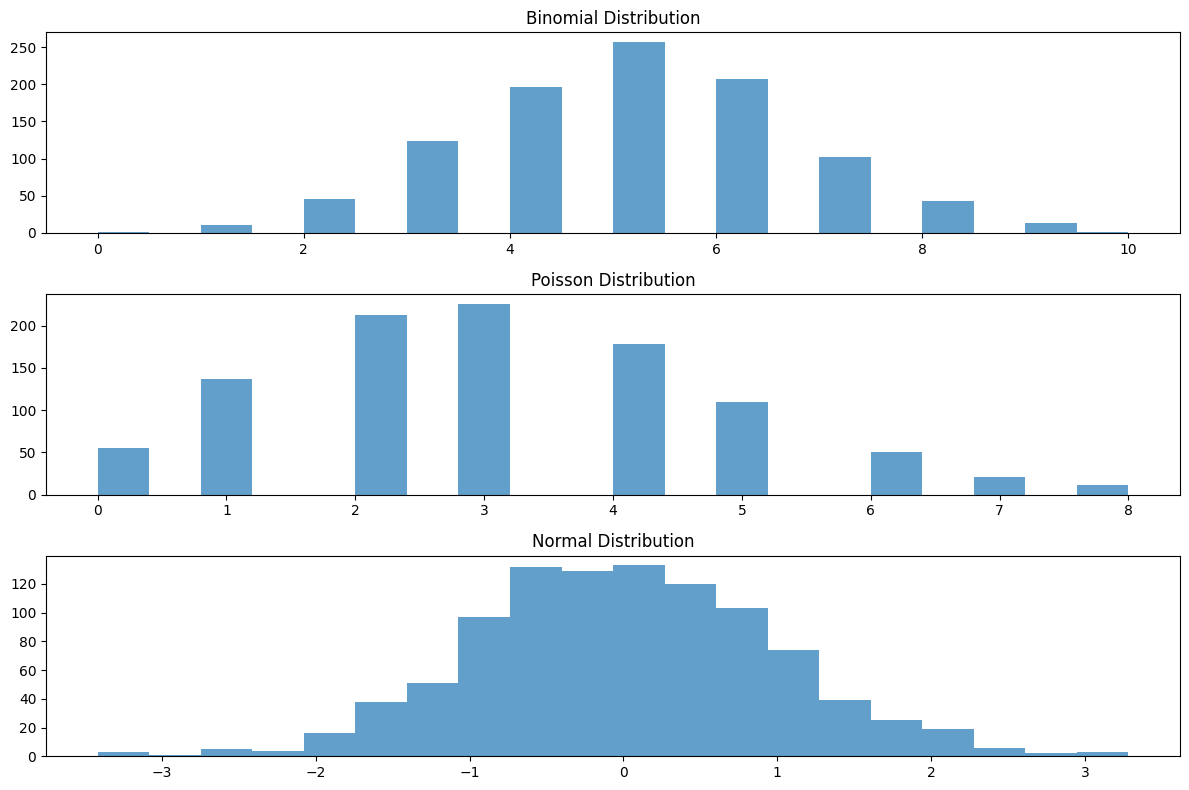

In [3]:
# Visualizing initial distributions
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.hist(binomial_data, bins=20, alpha=0.7)
plt.title('Binomial Distribution')
plt.subplot(312)
plt.hist(poisson_data, bins=20, alpha=0.7)
plt.title('Poisson Distribution')
plt.subplot(313)
plt.hist(normal_data, bins=20, alpha=0.7)
plt.title('Normal Distribution')
plt.tight_layout()
plt.show()


**Implementing Different Sampling Methods**

In [4]:
import numpy as np
import pandas as pd

# Creating a dataset
data = pd.DataFrame({
    'value': np.random.randint(0, 100, size=1000),
    'group': np.random.choice(['A', 'B', 'C', 'D'], size=1000)
})

# Random Sampling
random_sample = data.sample(n=100)

# Systematic Sampling
step = len(data) // 100
systematic_sample = data.iloc[::step]

# Stratified Sampling
stratified_sample = data.groupby('group', group_keys=False).apply(lambda x: x.sample(min(len(x), 25)))

# Cluster Sampling
clusters = data['group'].unique()
selected_clusters = np.random.choice(clusters, 2, replace=False)
cluster_sample = data[data['group'].isin(selected_clusters)]

print("Random Sample:\n", random_sample.head())
print("Systematic Sample:\n", systematic_sample.head())
print("Stratified Sample:\n", stratified_sample.head())
print("Cluster Sample:\n", cluster_sample.head())


Random Sample:
      value group
118      6     D
603     56     D
236     95     A
495      4     D
722     31     A
Systematic Sample:
     value group
0       8     B
10     14     D
20     85     B
30     65     C
40     42     D
Stratified Sample:
      value group
41       2     A
835     83     A
866     38     A
637     97     A
45      90     A
Cluster Sample:
    value group
0      8     B
1     95     A
2     15     A
5     89     A
7     66     B


<ipython-input-4-c26af8886568>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('group', group_keys=False).apply(lambda x: x.sample(min(len(x), 25)))


**The Effect of Sample Size and Independence on CLT Assumptions**

{10: [51.6, 52.0, 62.9, 45.3, 55.1, 63.5, 40.4, 37.3, 29.2, 50.3, 59.6, 50.0, 38.1, 68.8, 46.5, 41.7, 59.1, 54.7, 41.8, 63.7, 70.7, 51.6, 70.0, 51.1, 42.9, 48.4, 47.9, 52.3, 43.7, 42.3, 44.6, 38.8, 46.0, 52.5, 48.9, 49.2, 43.7, 56.7, 66.5, 51.0, 63.5, 41.1, 55.5, 49.7, 62.0, 38.8, 48.0, 46.0, 62.5, 65.6, 36.8, 63.7, 53.0, 39.7, 50.2, 53.3, 49.2, 49.8, 45.7, 52.0, 63.2, 42.7, 69.6, 65.2, 62.1, 48.2, 44.0, 50.2, 60.9, 50.4, 57.8, 41.7, 42.1, 44.0, 56.5, 40.6, 49.4, 39.8, 33.6, 30.1, 62.3, 62.7, 59.7, 64.6, 59.7, 61.4, 30.1, 44.8, 58.3, 54.7, 53.4, 60.6, 56.3, 50.6, 58.2, 42.7, 45.2, 48.8, 63.3, 40.8, 36.6, 52.4, 54.5, 40.7, 67.7, 49.4, 33.3, 49.7, 48.0, 60.8, 53.5, 41.4, 47.4, 56.5, 57.5, 51.5, 38.3, 45.3, 42.8, 40.2, 46.0, 54.0, 50.0, 59.6, 53.9, 76.4, 56.5, 30.6, 47.0, 51.2, 57.6, 63.1, 46.5, 38.2, 57.8, 61.0, 46.7, 44.6, 46.2, 47.5, 41.1, 40.6, 55.6, 48.0, 58.0, 48.2, 58.2, 65.2, 63.4, 58.2, 48.3, 46.2, 52.2, 39.5, 46.4, 59.8, 64.1, 48.8, 36.0, 47.4, 31.8, 52.5, 48.6, 33.6, 55.1, 56.1

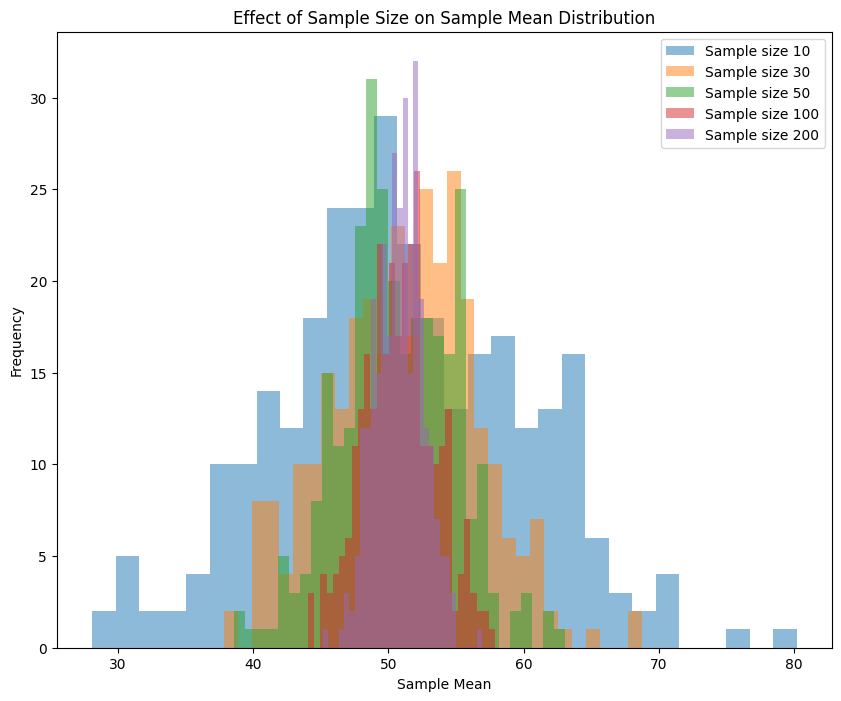

In [8]:
import matplotlib.pyplot as plt

# This line defines a list of different sample sizes that will be used to demonstrate how the distribution of sample means changes with different sample sizes.
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {size: [data['value'].sample(size).mean() for _ in range(300)] for size in sample_sizes}
print (sample_means)
# Plotting the results
plt.figure(figsize=(10, 8))
for size, means in sample_means.items():
    plt.hist(means, alpha=0.5, bins=30, label=f'Sample size {size}')
plt.legend()
plt.title('Effect of Sample Size on Sample Mean Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()
